First step is to find a gaussian fit for the data. This fit will have to be shifted up with a constant B, to count for the background data. It will give the number of events that are in the peak

C:\Users\Ryan\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\Ryan\Anaconda3\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


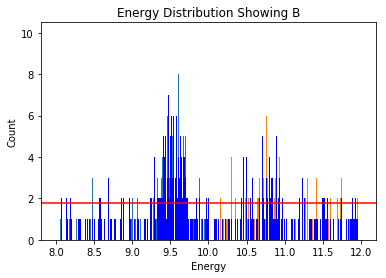

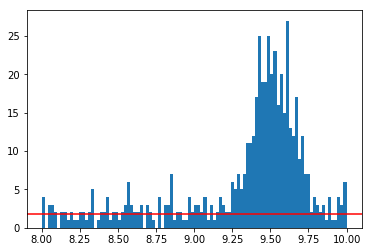

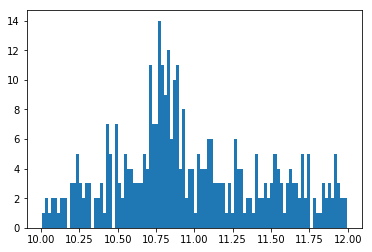

1.7832167832167831
nan


In [43]:
#Imports
import numpy as np
from scipy.integrate import quad
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import interactive
interactive(True)

#Load in the data - May want to add try/catch block
data = np.loadtxt('../data/test_data_two_peaks_A.dat',)
#Load Columns
day = data[:,0]
energy = data[:,1]
riseTime = data[:,2]

#Seperate the peaks based on observation
energyA = np.array([])
energyB = np.array([])

for i in range(0,len(energy)):
    if(energy[i]<10):
        energyA = np.append(energyA, energy[i])
    elif(energy[i]>=10):
        energyB = np.append(energyB, energy[i])


#Isolated the background data to find mean. This mean will be the B constant in the gaussian fit 
#First Peak
histA = plt.hist(energyA, bins = len(energyA))[0]
background = np.array([])
for i in range(0,len(energyA)):
    if(energyA[i]<9.0 or (energyA[i]>9.75 and energyA[i]<10)):
        background = np.append(background, histA[i])     
Ba = np.mean(background)

#Second Peak
histB = plt.hist(energyB, bins = len(energyB))[0]
background = np.array([])
for i in range(0,len(energyB)):
    if(energyB[i]<9.0 or (energyB[i]>9.75 and energyB[i]<10)):
        background = np.append(background, histB[i])   
Bb = np.mean(background)

plt.hist(energy, bins =len(energyA)+len(energyB), color='b')
plt.axhline(y=Ba, color='r', linestyle='-')
plt.axhline(y=Bb, color='g', linestyle='-')
plt.title("Energy Distribution Showing B")
plt.ylabel("Count")
plt.xlabel("Energy")
plt.show()


plt.hist(energyA, bins =100)
plt.axhline(y=Ba, color='r', linestyle='-')
plt.show()
plt.hist(energyB, bins =100)
plt.axhline(y=Bb, color='g', linestyle='-')
plt.show()

print(Ba)
print(Bb)

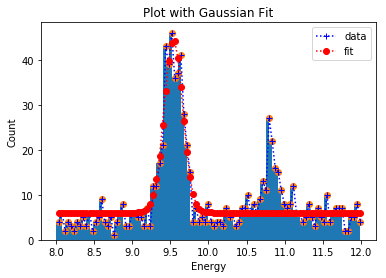

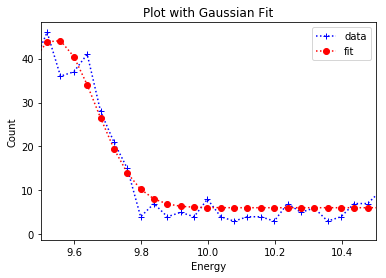

Gaussian information:
      G1(x) =  19.203374*exp(-(x-9.541375)**2/(2*-0.122059**2)) + 19.202799
       Where the Amplitude = 19.203374
       Where the Mean = 9.541375
       Where the Standard Deviation = -0.122059
       Where the Constant B = 19.202799

      G2(x) =  9.541285*exp(-(x--0.122052)**2/(2*6.054667**2)) + 19.202799
       Where the Amplitude = 9.541285
       Where the Mean = -0.122052
       Where the Standard Deviation = 6.054667
       Where the Constant B = 19.202799


In [2]:
from scipy.optimize import curve_fit
from scipy import asarray as ar,exp

y, x, _ = plt.hist(energy,bins=100)


x = x[1:] 


n = len(energy)                     #the number of data
mean = sum(x*y)/n                   #note this correction
sigma = sum(y*(x-mean)**2)/n        #note this correction

plt.plot(x, y, 'o')

def gaus(x,a0,x00,sigma0,a1,x10,sigma1, B):
    return a0*exp(-(x-x00)**2/(2*sigma0**2)) + a1*exp(-(x-x10)**2/(2*sigma1**2)) + B

popt,pcov = curve_fit(gaus,x,y,p0=[1,mean,sigma, 1, mean, sigma, B])
yGauss = gaus(x,*popt)

plt.plot(x,y,'b+:',label='data')
plt.plot(x,gaus(x,*popt),'ro:',label='fit')
plt.legend()
plt.title("Plot with Gaussian Fit")
plt.xlabel('Energy')
plt.ylabel('Count')
plt.show()

plt.plot(x,y,'b+:',label='data')
plt.plot(x,gaus(x,*popt),'ro:',label='fit')
plt.xlim([9.5, 10.5])
plt.legend()
plt.title("Plot with Gaussian Fit")
plt.xlabel('Energy')
plt.ylabel('Count')
plt.show()


print("Gaussian information:")
print("      G1(x) =  %f*exp(-(x-%f)**2/(2*%f**2)) + %f" %(popt[0], popt[1], popt[2], popt[3]))
print("       Where the Amplitude = %f" %popt[0])
print("       Where the Mean = %f" %popt[1])
print("       Where the Standard Deviation = %f" %popt[2])
print("       Where the Constant B = %f" %popt[3])
print("")
print("      G2(x) =  %f*exp(-(x-%f)**2/(2*%f**2)) + %f" %(popt[4], popt[5], popt[6], popt[3]))
print("       Where the Amplitude = %f" %popt[4])
print("       Where the Mean = %f" %popt[5])
print("       Where the Standard Deviation = %f" %popt[6])
print("       Where the Constant B = %f" %popt[3])

The desired value is the area under the curve of the Gaussian. This is the total number of events observed. There are two possible ways to obtain this; Count the bins that are within the curve, Integrate the  Guassian from the beginning of the peak to the end

In [37]:
#Adding the bins - as simple as looping through the events from 9.5 to 10.5, adding them, and subtracting the background
Sum = 0

for i in energy:
    
    if(i>9.5 and i<10.5):
        Sum = Sum + i - popt[3]
        
print("The summation of the bins in the peak is %f" %Sum)

#Using the quad method from the scipy.integrate class, 
#the previosuly defined gaus function can be passed in and the integral is solved


I = quad(gaus, 9.5, 10.5, args=(popt[0], popt[1], popt[2], popt[3]))

numEvents = I[0]/.04

print("The integral of the peak is %f" %I[0])
print("The number of events in the peak is %f" %numEvents)

The summation of the bins in the peak is 41.541490
The integral of the peak is 18.277458
The number of events in the peak is 456.936452


In [21]:
4/100


0.04